In [1]:
import numpy as np

In [2]:
p1_transform = np.array([[-8.16843534e-01, -5.76859013e-01, -5.66573777e-04,  6.62040098e-01],
                         [-5.76758862e-01,  8.16682604e-01,  1.94612586e-02,  3.08967369e-01],
                         [-1.07636914e-02,  1.62235797e-02, -9.99810451e-01,  1.46636637e-01],
                         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])
p2_transform = np.array([[-0.99434953, -0.10322289, -0.02477986,  0.65651506],
                         [-0.1035818 ,  0.99452709,  0.01366262, -0.06192352],
                         [ 0.02323394,  0.01615217, -0.99959957,  0.14809759],
                         [ 0.        ,  0.        ,  0.        ,  1.        ]])
p3_transform = np.array([[-0.89780702, -0.43660928, -0.05757502,  0.93047206],
                         [-0.43678759,  0.89950778, -0.01011694,  0.30926958],
                         [ 0.05620633,  0.016065  , -0.99828992,  0.14337146],
                         [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [3]:
p1_p2_transform = np.linalg.inv(p1_transform) @ p2_transform 

In [4]:
p1_p3_transform = np.linalg.inv(p1_transform) @ p3_transform

## Wektory bazowe

In [5]:
p1_p2_transform

array([[ 0.87171962, -0.48945922,  0.02312061,  0.21841197],
       [ 0.48938297,  0.87202007,  0.00923543, -0.29968927],
       [-0.024682  ,  0.00326412,  0.99969003, -0.00867555],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [6]:
p1_p3_transform

array([[ 0.98468398, -0.16233053,  0.0636101 , -0.21940607],
       [ 0.16210311,  0.98673499,  0.0087545 , -0.15465356],
       [-0.06418744,  0.00169097,  0.99793643,  0.00311835],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [7]:
base_vector_p1_p2 = p1_p2_transform[:3, 3] / np.linalg.norm(p1_p2_transform[:3, 3])

In [8]:
base_vector_p1_p3 = p1_p3_transform[:3, 3] / np.linalg.norm(p1_p3_transform[:3, 3])

In [9]:
base_vector_p1_p2

array([ 0.58881481, -0.80792952, -0.02338833])

In [10]:
base_vector_p1_p3

array([-0.81730096, -0.57609392,  0.01161605])

In [11]:
base_vector_p1_p2 @ base_vector_p1_p3

-0.016067312979910296

In [12]:
base_vector_p1_p2[0] * base_vector_p1_p3[0] + base_vector_p1_p2[1] * base_vector_p1_p3[1] + base_vector_p1_p2[2] * base_vector_p1_p3[2]

-0.016067312979910296

In [13]:
np.math.acos(-0.016067312979910296)

1.586864331174158

In [14]:
robot_x_base_vector = np.array([1, 0, 0])
robot_y_base_vector = np.array([0, 1, 0])

In [15]:
base_vector_p1_p2 @ robot_x_base_vector

0.5888148130338793

In [16]:
base_vector_p1_p2 @ robot_y_base_vector

-0.8079295153942456

In [17]:
np.math.acos(0.5888148130338793)

0.9412045997965235

In [18]:
np.math.acos(-0.8079295153942456)

2.5114263417586717

# Kalibracja 

In [19]:
import numpy as np
import roboticstoolbox as rtb
from roboticstoolbox.robot.ERobot import ERobot
from math import pi
import os

In [20]:
class AvenaRobot(ERobot):
    """
    Class that imports a planar3DOF Robot
    """

    def __init__(self):
        args = super().URDF_read(os.getcwd()+"/xacro/avena_description/robots/avena_arm.urdf.xacro")

        super().__init__(
            args[0],
            name=args[1])

In [21]:
robot = AvenaRobot()

In [22]:
robot

ERobot: avena, 6 joints (RRRRRR), dynamics, geometry, collision
┌─────┬──────────────────────────┬───────┬──────────────────────────┬────────────────────────────────────────────────────┐
│link │           link           │ joint │          parent          │                ETS: parent to link                 │
├─────┼──────────────────────────┼───────┼──────────────────────────┼────────────────────────────────────────────────────┤
│   0 │ robot_base_link          │       │ BASE                     │                                                    │
│   1 │ avena_link_0             │       │ robot_base_link          │ SE3()                                              │
│   2 │ avena_link_1             │     0 │ avena_link_0             │ SE3(0, 0, 0.063) ⊕ Rz(q0)                          │
│   3 │ avena_link_2             │     1 │ avena_link_1             │ SE3(0.063, 0, 0.0763; 0°, 90°, -0°) ⊕ Rz(q1)       │
│   4 │ avena_link_3             │     2 │ avena_link_2             │ SE3(-

In [23]:
# robot.plot(origin)

In [24]:
p1 = [-0.236, -1.805, -0.494, -1.979, 1.265, 0.122]
p2 = [-0.651, -1.154, 0.333, -1.794, 2.44, 0.122]
p3 = [-0.472, -0.032, 0.017, -1.791, 2.371, 0.122]
# origin = [-0.619, -0.232, 0, -1.481, -2.238, 0.069]
# x_dir = [-1.068, -0.184, -0.009, -1.624, -2.245, 0.067]
# y_dir = [-0.026, -0.068, -0.023, -1.877, -2.241, 0.067]
origin = [-0.825, -0.61, -0.493, -1.05, -1.387, 0.017]
x_dir = [-1.251, -0.608, -0.599, -1.247, -1.376, 0.017]
y_dir = [-0.294, -0.596, -0.74, -1.244, -1.376, 0.017]

In [25]:
p1_robot_base = robot.fkine(p1).data[0]
p2_robot_base = robot.fkine(p2).data[0]
p3_robot_base = robot.fkine(p3).data[0]
origin_xyz = robot.fkine(origin).data[0]
x_dir_xyz = robot.fkine(x_dir).data[0]
y_dir_xyz = robot.fkine(y_dir).data[0]

In [26]:
y_dir_xyz

array([[-0.24182475,  0.96868508,  0.05630283,  0.25043439],
       [-0.85624894, -0.1857398 , -0.48201501,  0.2399218 ],
       [-0.45646307, -0.16477239,  0.87435206,  1.59495057],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [27]:
p1_robot_base_xyz = p1_robot_base[:3, 3]
p2_robot_base_xyz = p2_robot_base[:3, 3]
p3_robot_base_xyz = p3_robot_base[:3, 3]
p4_robot_base_xyz = p1_robot_base[:3, 3]


In [28]:
p1_robot_base_xyz

array([0.44629386, 1.03743175, 0.06801785])

In [36]:
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
%matplotlib widget

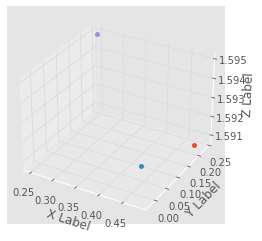

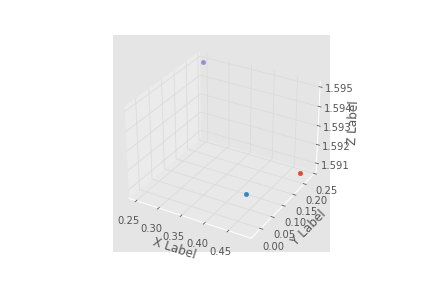

In [37]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(*origin_xyz[:3, 3])
ax.scatter(*x_dir_xyz[:3, 3])
ax.scatter(*y_dir_xyz[:3, 3])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
display(fig)

In [30]:
x0 = origin_xyz[:3, 3][0]
y0 = origin_xyz[:3, 3][1]
z0 = origin_xyz[:3, 3][2]
x1 = x_dir_xyz[:3, 3][0]
y1 = x_dir_xyz[:3, 3][1]
z1 = x_dir_xyz[:3, 3][2]
x2 = y_dir_xyz[:3, 3][0]
y2 = y_dir_xyz[:3, 3][1]
z2 = y_dir_xyz[:3, 3][2]

final_transform = np.zeros(shape=(4, 4))

In [35]:
y_dir_xyz[:3, 3]

array([0.25043439, 0.2399218 , 1.59495057])

In [38]:
final_transform[0][0] = (-x0 + x1) / np.sqrt((x0 - x1)**2 + (y0 - y1)**2 + (z0 - z1)**2)
final_transform[0][1] = (-x0 + x2) / np.sqrt((x0 - x2)**2 + (y0 - y2)**2 + (z0 - z2)**2)
final_transform[0][2] = (y2*(z0-z1) + y0*(z1-z2) + y1*(z2-z0)) / (np.sqrt(x0**2 - 2*x0*x1 + x1**2 +  y0**2 - 2*y0*y1 + y1**2 + z0**2 - 2*z0*z1 + z1**2)*np.sqrt(x0**2 - 2*x0*x2 + x2**2 +  y0**2 - 2*y0*y2 + y2**2 + z0**2 - 2*z0*z2 + z2**2))
final_transform[0][3] = x0

final_transform[1][0] = (-y0 + y1) / np.sqrt((x0 - x1)**2 + (y0 - y1)**2 + (z0 - z1)**2)
final_transform[1][1] = (-y0 + y2) / np.sqrt((x0 - x2)**2 + (y0 - y2)**2 + (z0 - z2)**2)
final_transform[1][2] = (x2*(z1-z0) + x1*(z2-z0) + x0*(z2-z1)) / (np.sqrt(x0**2 - 2*x0*x1 + x1**2 +  y0**2 - 2*y0*y1 + y1**2 + z0**2 - 2*z0*z1 + z1**2)*np.sqrt(x0**2 - 2*x0*x2 + x2**2 +  y0**2 - 2*y0*y2 + y2**2 + z0**2 - 2*z0*z2 + z2**2))
final_transform[1][3] = y0

final_transform[2][0] = (-z0 + z1) / np.sqrt((x0 - x1)**2 + (y0 - y1)**2 + (z0 - z1)**2)
final_transform[2][1] = (-z0 + z2) / np.sqrt((x0 - x2)**2 + (y0 - y2)**2 + (z0 - z2)**2)
final_transform[2][2] = (x2*(y0-y1) + x0*(y1-y2) + x1*(y2-y0)) / (np.sqrt(x0**2 - 2*x0*x1 + x1**2 +  y0**2 - 2*y0*y1 + y1**2 + z0**2 - 2*z0*z1 + z1**2)*np.sqrt(x0**2 - 2*x0*x2 + x2**2 +  y0**2 - 2*y0*y2 + y2**2 + z0**2 - 2*z0*z2 + z2**2))
final_transform[2][3] = z0

final_transform[3][3] = 1



In [39]:
final_transform

array([[-0.01742013, -0.99429037, -0.01843869,  0.48094548],
       [-0.99982636,  0.10522245,  0.06515936,  0.21552757],
       [ 0.00661704,  0.01774551, -0.99595071,  1.59083655],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [43]:
x_vector = x_dir_xyz[:3, 3] - origin_xyz[:3, 3]
y_vector = y_dir_xyz[:3, 3] - origin_xyz[:3, 3]

In [46]:
np.math.acos((x_vector @ y_vector)/(np.linalg.norm(x_vector)*np.linalg.norm(y_vector)))

1.6586754838313105